##### NAME: E NYANGULE
##### STUDENT NO: 221000329

##### Impact of COVID-19 on Happiness: A Comparative Analysis of Developed and Developing Countries

#### Introduction
COVID-19 has brought unprecedented changes globally with impacts on people’s health, including both physical and psychological aspects. When countries introduced lockdowns, wearing of face masks, and travel restrictions to prevent the spread of the virus, most activities in life were changed and this led to high levels of stress, anxiety and uncertainty. Happiness, which is normally assessed using the well-being questionnaires like the World Happiness Report, is a significant marker of the health of society and people. This paper seeks to examine the effect that COVID-19 has had on happiness worldwide with special reference to developed and developing nations.. This analysis is an attempt to look at the social impact of the pandemic by looking at the happiness scores before and after the pandemic and comparing the trends between the developed and developing nation

Primary Question:
To what extent did the COVID-19 pandemic influence global happiness level?

Secondary Question:
How did the effects of COVID-19 on happiness differ between developed and developing nations?

#### Significance 
A pandemic has affected people’s lives in different ways and it is crucial to consider the effects of COVID-19 on the happiness level as a part of the quality of life and psychological well-being. The COVID-19 impact on happiness is not equal because the factors which determines the happiness are not equal they are healthcare, economical, social and governmental. Perhaps in the developed countries social services, proper health care, counseling services could have lessened the effects. On the other hand, the countries with the somewhat lower standards of health care services and social protection might be worse with the decrease of the level of happiness.

Such information can be used to design the kind of interventional strategies that could enhance the psychological well-being and the life experience of people during these periods. It involves the extent to which society is ready to cope with future shocks and the funds that are available for the mental health services particularly on the issue of sensitivity. Moreover, this approach is useful because it describes how the happiness was changed in various contexts, and such data can be used to build the recovery and resilience in both the developed and the developing countries.

### Importing Libraries

In [53]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

### Data Preparation

In [54]:
file_path = r'C:\Users\User\Desktop\BCom Hons\Predictive analysis\Happiness data'
path      = r'C:\Users\User\Desktop\BCom Hons\Predictive analysis' 
happiness_2018 = pd.read_csv(f'{file_path}\\2018.csv')
happiness_2019 = pd.read_csv(f'{file_path}\\2019.csv')
happiness_2020 = pd.read_csv(f'{file_path}\\2020.csv')
covid_19 = pd.read_csv(f'{path}\\covid19.csv')


# Displaying the first few rows 
def display_table(df, title):
    print(f"\n{title}\n")
    display(df)
    
display_table(happiness_2018.head(),'Happiness 2018')
display_table(happiness_2019.head(), 'Happiness 2019')
display_table(happiness_2020.head(), 'Happiness 2020')
display_table(covid_19.head(),'Covid19 2020')


Happiness 2018



Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357


Happiness 2019



Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298


Happiness 2020



Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.949172   -0.059482                   0.195445   
1                      0.951444    0.066202                   0.168489   
2                      0.921337    0.105911                   0.303728   
3                      0.948892    0.246944                   0.711710   
4                      0.955750    0.134533                   0.263218   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                  1.972317                          1.285190   
1                  1.972317                          1.326949   
2                  1.972317                          1.390774   
3                  1.972317                          1.326502   
4                  1.972317                          1.424207   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.499526                               0.961271   
1                      1.503449                               0.979333   
2                      1.472403                               1.040533   
3                      1.547567                               1.000843   
4                      1.495173                               1.008072   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.662317                  0.159670   
1                                    0.665040                  0.242793   
2                                    0.628954                  0.269056   
3                                    0.661981                  0.362330   
4                                    0.670201                  0.287985   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                 0.477857             2.762835  
1                                 0.495260             2.432741  
2                                 0.407946             2.350267  
3                                 0.144541             2.460688  
4                                 0.434101             2.168266


Covid19 2020



Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  1/22/2020          0   
1            NaN        Albania  41.15330  20.168300  1/22/2020          0   
2            NaN        Algeria  28.03390   1.659600  1/22/2020          0   
3            NaN        Andorra  42.50630   1.521800  1/22/2020          0   
4            NaN         Angola -11.20270  17.873900  1/22/2020          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [55]:
# converting "Date" Column to datetime
covid_19['Date'] = pd.to_datetime(covid_19['Date'])


def display_table(df, title):
    print(f"\n{title}\n")
    display(df)
    
display_table(covid_19['Date'].head(), 'Date')



Date



0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: Date, dtype: datetime64[ns]

In [56]:
#Index for covid dataset
covid_19.set_index('Date', inplace=True)

def display_table(df, title):
    print(f"\n{title}\n")
    display(df)
    
display_table(covid_19.index, 'Covid dataset Index')




Covid dataset Index



DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27',
               '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27',
               '2020-07-27', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=49068, freq=None)

In [57]:
#Index for Happiness dataset
print(happiness_2018.head())
print(happiness_2019.head())
print(happiness_2020.head())

happiness_2018.set_index('Country or region', inplace=True)
happiness_2019.set_index('Country or region', inplace=True)
happiness_2020.set_index('Country name', inplace=True)

print(happiness_2018.index)
print(happiness_2019.index)
print(happiness_2020.index)

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

### Data Cleaning

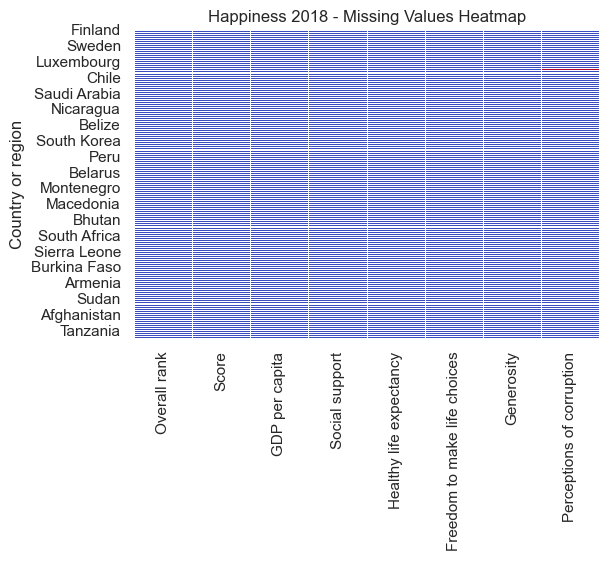


Happiness 2019 - No Missing Values


Happiness 2020 - No Missing Values

Covid19 2020 - Missing Values Found


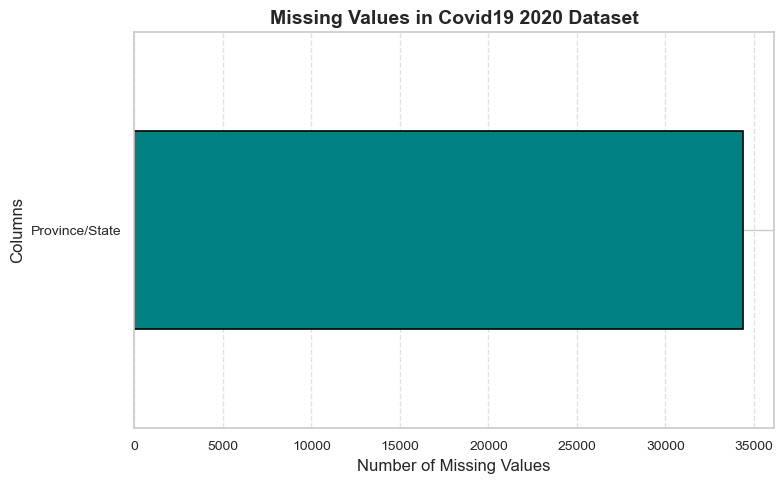

In [58]:
# Checking for missing values in the COVID-19 dataset
def heatmap_missing_values(df, title):
    missing_counts = df.isnull().sum()
    if missing_counts.sum() == 0:
        print(f"\n{title} - No Missing Values\n")
    else:
        sorted_columns = missing_counts.sort_values().index
        sorted_df = df[sorted_columns]
        plt.figure(figsize=(6, 4))  
        sns.heatmap(sorted_df.isnull(), cbar=False, cmap='coolwarm', linewidths=0.5, linecolor='white')
        plt.title(f"{title} - Missing Values Heatmap", fontsize=12)
        plt.show()


heatmap_missing_values(happiness_2018, 'Happiness 2018')
heatmap_missing_values(happiness_2019, 'Happiness 2019')
heatmap_missing_values(happiness_2020, 'Happiness 2020')


# covid_19 dataset
def plot_missing_values(df):
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    
    if missing_counts.empty:
        print("Covid19 2020 - No Missing Values")
    else:
        print("Covid19 2020 - Missing Values Found")
        plt.figure(figsize=(8, 5))
        ax = missing_counts.sort_values().plot(kind='barh', color='teal', edgecolor='black', linewidth=1.2)
        ax.set_title('Missing Values in Covid19 2020 Dataset', fontsize=14, fontweight='bold')
        ax.set_xlabel('Number of Missing Values', fontsize=12)
        ax.set_ylabel('Columns', fontsize=12)
        ax.grid(axis='x', linestyle='--', alpha=0.6)
        ax.tick_params(axis='both', which='major', labelsize=10)  
        plt.tight_layout()  
        plt.show()

plot_missing_values(covid_19)

In [59]:
# Handling missing values for Happiness 2018
happiness_2018['Score'].fillna(happiness_2018['Score'].mean(), inplace=True)
happiness_2018['GDP per capita'].fillna(happiness_2018['GDP per capita'].mean(), inplace=True)
happiness_2018['Social support'].fillna(happiness_2018['Social support'].mean(), inplace=True)
happiness_2018['Healthy life expectancy'].fillna(happiness_2018['Healthy life expectancy'].mean(), inplace=True)
happiness_2018['Freedom to make life choices'].fillna(happiness_2018['Freedom to make life choices'].mean(), inplace=True)
happiness_2018['Generosity'].fillna(happiness_2018['Generosity'].mean(), inplace=True)
happiness_2018['Perceptions of corruption'].fillna(happiness_2018['Perceptions of corruption'].mean(), inplace=True)

print(happiness_2018.isnull().sum())

# Handling missing values for COVID-19 dataset
covid_19.dropna(subset=['Country/Region'], inplace=True)  # Remove rows where 'Country/Region' is missing
covid_19['Lat'].fillna(covid_19['Lat'].mean(), inplace=True)  
covid_19['Long'].fillna(covid_19['Long'].mean(), inplace=True)  
covid_19['Confirmed'].fillna(covid_19['Confirmed'].mean(), inplace=True)  
covid_19['Deaths'].fillna(covid_19['Deaths'].mean(), inplace=True)  
covid_19['Recovered'].fillna(covid_19['Recovered'].mean(), inplace=True)  
covid_19['Active'].fillna(covid_19['Active'].mean(), inplace=True)  
covid_19['WHO Region'].fillna('Unknown', inplace=True)

print(covid_19.isnull().sum())

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [60]:
# Resetting the index to make 'Date' a column again
covid_19.reset_index(inplace=True)

In [61]:
#Combining datasets
#happiness and covid19
merged_2020 = pd.merge(happiness_2020, covid_19, left_on='Country name', right_on='Country/Region', how='inner')
def display_table(df, title):
    print(f"\n{title}\n")
    display(df)
    
display_table(merged_2020.head(), 'Covid and happiness data merged')

#Hapiness 2018-2019
happiness_combined = pd.concat([happiness_2018, happiness_2019, happiness_2020])
print(happiness_combined)



Covid and happiness data merged



Regional indicator  Ladder score  Standard error of ladder score  \
0     Western Europe        7.8087                        0.031156   
1     Western Europe        7.8087                        0.031156   
2     Western Europe        7.8087                        0.031156   
3     Western Europe        7.8087                        0.031156   
4     Western Europe        7.8087                        0.031156   

   upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0      7.869766      7.747634              10.639267         0.95433   
1      7.869766      7.747634              10.639267         0.95433   
2      7.869766      7.747634              10.639267         0.95433   
3      7.869766      7.747634              10.639267         0.95433   
4      7.869766      7.747634              10.639267         0.95433   

   Healthy life expectancy  Freedom to make life choices  Generosity  ...  \
0                71.900825                      0.949172   -0.059482  ...   
1                71.900825                      0.949172   -0.059482  ...   
2                71.900825                      0.949172   -0.059482  ...   
3                71.900825                      0.949172   -0.059482  ...   
4                71.900825                      0.949172   -0.059482  ...   

        Date  Province/State  Country/Region       Lat       Long  Confirmed  \
0 2020-01-22             NaN         Finland  61.92411  25.748151          0   
1 2020-01-23             NaN         Finland  61.92411  25.748151          0   
2 2020-01-24             NaN         Finland  61.92411  25.748151          0   
3 2020-01-25             NaN         Finland  61.92411  25.748151          0   
4 2020-01-26             NaN         Finland  61.92411  25.748151          0   

   Deaths  Recovered  Active WHO Region  
0       0          0       0     Europe  
1       0          0       0     Europe  
2       0          0       0     Europe  
3       0          0       0     Europe  
4       0          0       0     Europe  

[5 rows x 29 columns]

                          Overall rank  Score  GDP per capita  Social support  \
Finland                            1.0  7.632           1.305        1.592000   
Norway                             2.0  7.594           1.456        1.582000   
Denmark                            3.0  7.555           1.351        1.590000   
Iceland                            4.0  7.495           1.343        1.644000   
Switzerland                        5.0  7.487           1.420        1.549000   
...                                ...    ...             ...             ...   
Central African Republic           NaN    NaN             NaN        0.319460   
Rwanda                             NaN    NaN             NaN        0.540835   
Zimbabwe                           NaN    NaN             NaN        0.763093   
South Sudan                        NaN    NaN             NaN        0.553707   
Afghanistan                        NaN    NaN             NaN        0.470367   

                          H

## Exploratory Data Analysis

#### Scatter Plot 
This scatter plot reveals a negative correlation between COVID-19 cases and happiness scores: as cases rise, happiness tends to decline. Most scores cluster between 3 and 8, with lower happiness levels associated with higher case counts. Outliers above score 6 suggest that some regions maintained higher happiness despite high case numbers. 

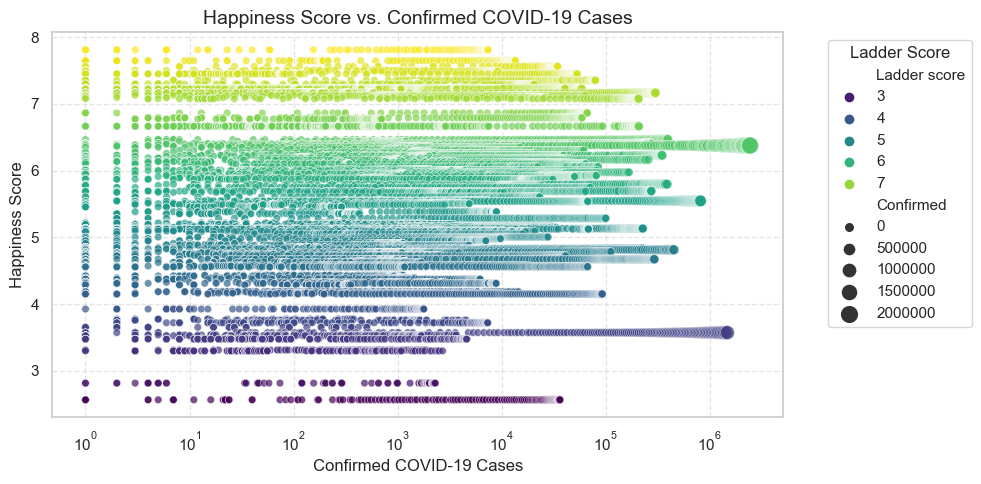

In [62]:
# Scatterplot 
plt.figure(figsize=(10, 5))  
sns.scatterplot(x=merged_2020['Confirmed'], y=merged_2020['Ladder score'], 
                hue=merged_2020['Ladder score'], palette='viridis', 
                size=merged_2020['Confirmed'], sizes=(30, 150), alpha=0.7)
plt.title('Happiness Score vs. Confirmed COVID-19 Cases', fontsize=14)
plt.xlabel('Confirmed COVID-19 Cases', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xscale('log')  
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Ladder Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()


#### Correlation Matrix 
This correlation matrix reveals strong positive relationships between happiness and factors like GDP per capita and social support, while indicating that higher COVID-19 cases and deaths correlate negatively with happiness. This matrix helps identify key influences on happiness and guides further analysis.

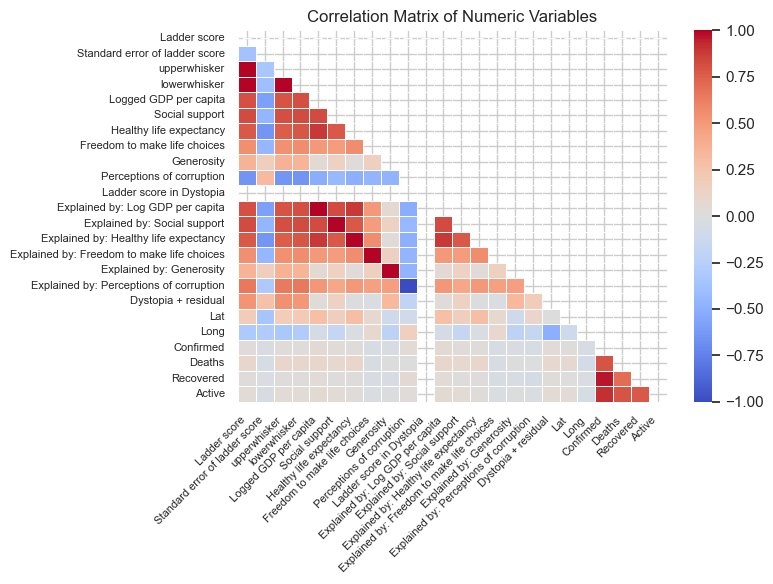

In [63]:
# Correlation matrix 
numeric_data = merged_2020.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

warnings.filterwarnings("ignore")

# Heatmap for the correlation matrix
plt.figure(figsize=(8, 6))  
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, linecolor='white', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables', fontsize=12)  
plt.xticks(rotation=45, ha='right', fontsize=8) 
plt.yticks(fontsize=8) 
plt.tight_layout()
plt.show()

#### Random Forest Model 
I used a Random Forest model to analyze the impact of COVID-19 on happiness levels. This ensemble learning technique aggregates multiple decision trees to provide more accurate and reliable predictions, effectively handling complex datasets with many variables.

In [64]:
#Forest model
features = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
            'Confirmed', 'Deaths']
X = merged_2020[features]
y = merged_2020['Ladder score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')
# Cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f'Cross-validated R² Scores: {scores}')
print(f'Mean R² Score: {scores.mean()}')

Mean Squared Error (MSE): 0.00
R² Score: 1.00
Cross-validated R² Scores: [-13.08294268  -4.30282477  -5.91766328  -6.67151317  -2.96519201]
Mean R² Score: -6.588027182891686


#### Feature Importances
##### High Importance Features

Logged GDP per capita is the most influential factor (0.656), significantly impacting happiness levels. Healthy life expectancy (0.158) and social support (0.083) also contribute notably to predicting happiness.
#### Low Importance Features

Deaths and confirmed cases have minimal impact on happiness (scores close to zero).

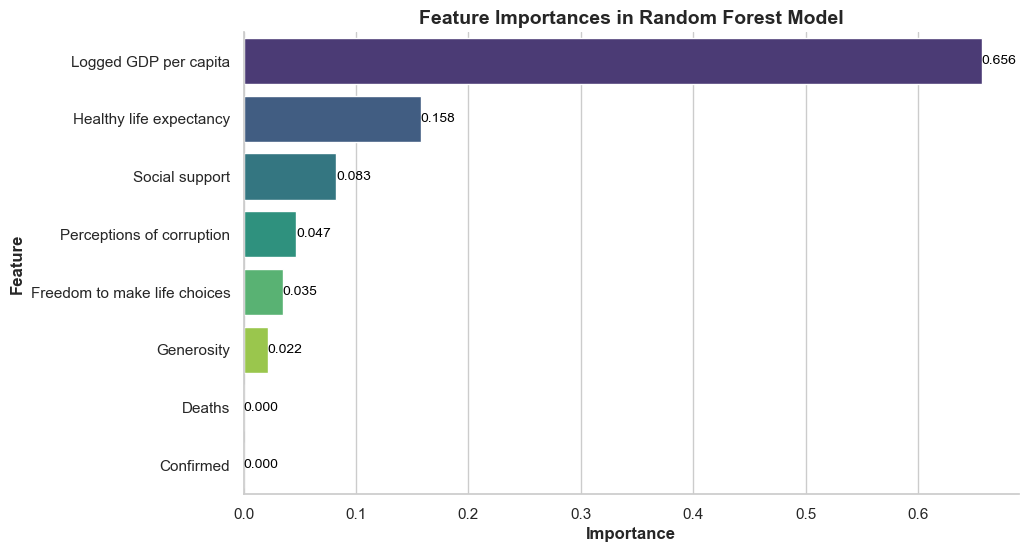

In [21]:
# feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))  
sns.set(style='whitegrid')  
palette = sns.color_palette('viridis')  

plot = sns.barplot(x='Importance', y='Feature', data=feature_importances, palette=palette, ci=None)
plt.title('Feature Importances in Random Forest Model', fontsize=14, weight='bold')
plt.xlabel('Importance', fontsize=12, weight='bold')
plt.ylabel('Feature', fontsize=12, weight='bold')

for index, value in enumerate(feature_importances['Importance']):
    plot.text(value, index, f'{value:.3f}', color='black', ha='left', va='center', fontsize=10)

sns.despine()
plt.show()


In [22]:
#Descriptive Statistics
mean_happiness = merged_2020['Ladder score'].mean()
median_happiness = merged_2020['Ladder score'].median()
std_happiness = merged_2020['Ladder score'].std()

# Print the statistics
print(f'Mean Happiness: {mean_happiness}')
print(f'Median Happiness: {median_happiness}')
print(f'Standard Deviation of Happiness: {std_happiness}')

# Descriptive statistics for COVID-19 cases (Confirmed cases)
mean_covid = merged_2020['Confirmed'].mean()
median_covid = merged_2020['Confirmed'].median()
std_covid = merged_2020['Confirmed'].std()

print(f'Mean COVID-19 Cases: {mean_covid}')
print(f'Median COVID-19 Cases: {median_covid}')
print(f'Standard Deviation of COVID-19 Cases: {std_covid}')


Mean Happiness: 5.739470348402778
Median Happiness: 5.640799999
Standard Deviation of Happiness: 1.1431775525499008
Mean COVID-19 Cases: 14542.00051713948
Median COVID-19 Cases: 245.0
Standard Deviation of COVID-19 Cases: 77771.80536677176


## Test for Seasonality and Stationarity

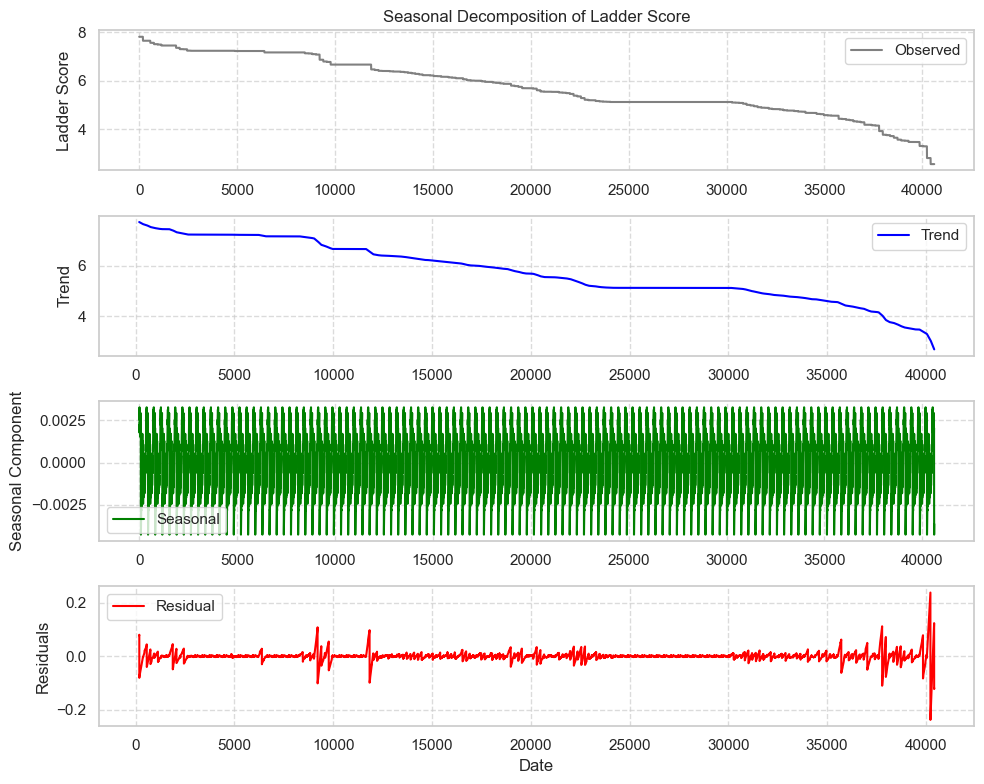

In [25]:
# Seasonal decomposition
decomposition = seasonal_decompose(merged_2020['Ladder score'], model='additive', period=365)
plt.figure(figsize=(10, 8)) 
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, color='gray', label='Observed', linewidth=1.5)
plt.title('Seasonal Decomposition of Ladder Score')
plt.ylabel('Ladder Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
#Trend
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, color='blue', label='Trend', linewidth=1.5)
plt.ylabel('Trend')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
# Seasonal
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, color='green', label='Seasonal', linewidth=1.5)
plt.ylabel('Seasonal Component')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
# Residual
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, color='red', label='Residual', linewidth=1.5)
plt.ylabel('Residuals')
plt.xlabel('Date')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [26]:
#Augmented Dickey-Fuller Test
adf_result = adfuller(merged_2020['Ladder score'].dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: 2.728305437334343
p-value: 0.9990879873593368


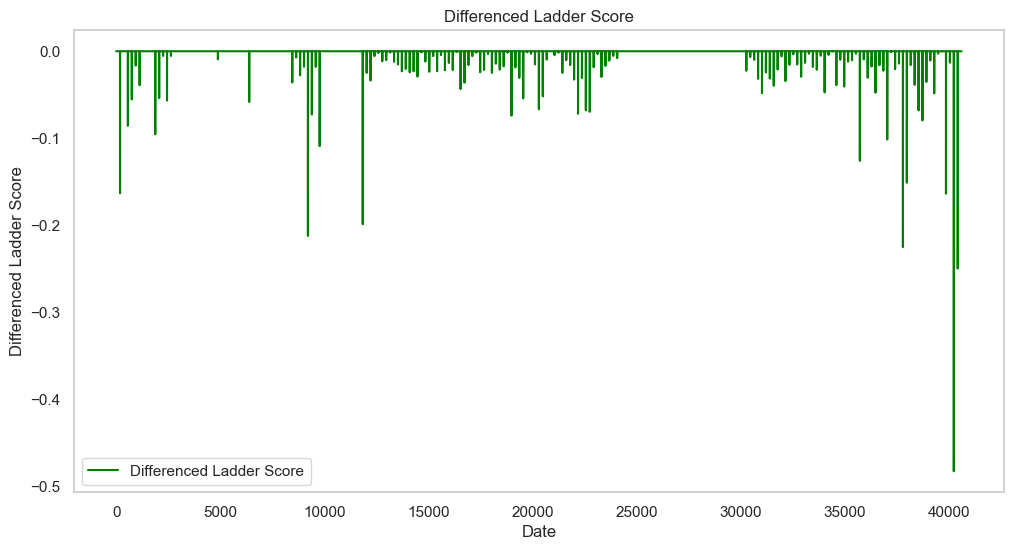

In [27]:
# differencing
merged_2020['Ladder_diff'] = merged_2020['Ladder score'].diff().dropna()

# Checking the differenced series
plt.figure(figsize=(12, 6))
plt.plot(merged_2020['Ladder_diff'], label='Differenced Ladder Score', color='green')
plt.title('Differenced Ladder Score')
plt.xlabel('Date')
plt.ylabel('Differenced Ladder Score')
plt.legend()
plt.grid()
plt.show()

In [28]:
# ADF test on the differenced ladder score
adf_result = adfuller(merged_2020['Ladder_diff'].dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -201.70741406456608
p-value: 0.0


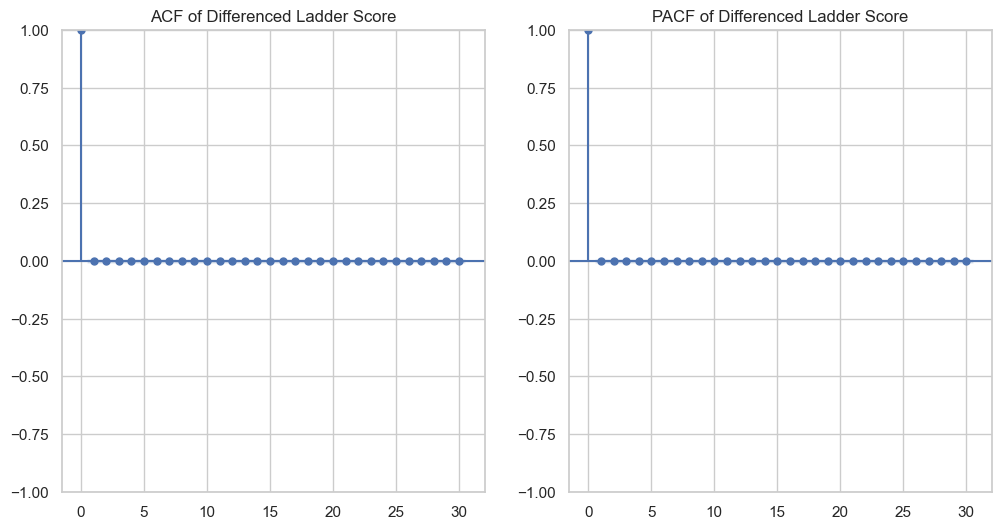

In [29]:
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(merged_2020['Ladder_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF of Differenced Ladder Score')
plt.subplot(1, 2, 2)
plot_pacf(merged_2020['Ladder_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF of Differenced Ladder Score')
plt.show()

#### Model Selection
##### ARIMA MODEL
I initially tested for stationarity using the Augmented Dickey-Fuller (ADF) test. The results showed a p-value of 0.9991, indicating that the series was non-stationary. To address this, I applied differencing, which is a common technique to stabilize the mean of a time series.

Upon retesting, the ADF statistic dropped to -201.7074, and the p-value improved to 0.0. These results provided strong evidence that the series is now stationary, allowing me to proceed confidently with the ARIMA model. This model is particularly well-suited for analyzing and forecasting time series data, making it an ideal choice for exploring the complex relationship between COVID-19 and happiness. With a stationary series, I can now uncover meaningful insights and trends that will enhance the understanding of how the pandemic has influenced well-being.

In [30]:
# Fitting the ARIMA model
model = ARIMA(merged_2020['Ladder score'], order=(0, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Ladder score   No. Observations:                40608
Model:                 ARIMA(0, 1, 1)   Log Likelihood              165892.628
Date:                Tue, 10 Sep 2024   AIC                        -331781.255
Time:                        23:03:23   BIC                        -331764.032
Sample:                             0   HQIC                       -331775.808
                              - 40608                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1       -1.86e-12    3.5e-25  -5.31e+12      0.000   -1.86e-12   -1.86e-12
sigma2      1.656e-05   2.12e-09   7826.102      0.000    1.66e-05    1.66e-05
Ljung-Box (L1) (Q):                   0.04   Jarque-

#### Histogram of Residuals
The histogram reveals a skewed distribution with multiple peaks, further confirming that the residuals are not normally distributed. This non-normality indicates that the model may not fully capture the underlying patterns in the data.

#### Q-Q Plot
The Q-Q plot of residuals shows that the points deviate significantly from the red diagonal line, indicating that the residuals do not follow a normal distribution. This suggests potential issues with the model fit

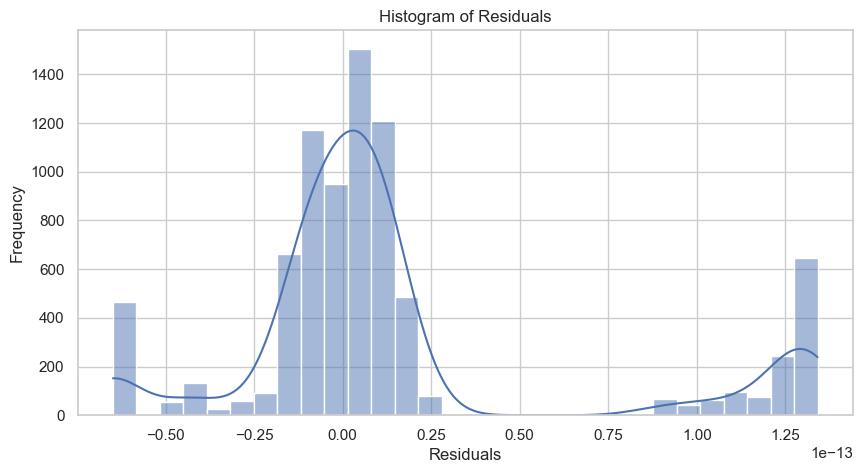

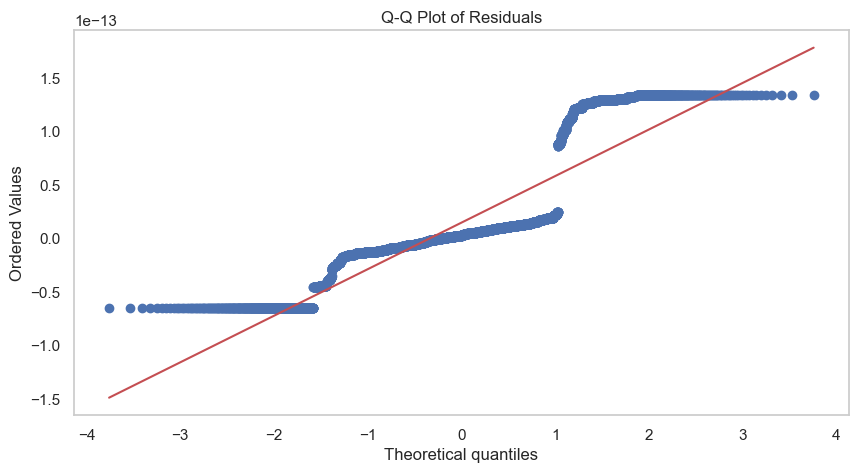

In [31]:
# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid()
plt.show()

This forecast visualization presents the predicted happiness scores based on the historical data up to August 2020.

#### Key Components of the Plot
#### Historical Data (Blue Lines)
The blue lines represent the historical happiness scores (Ladder Scores) over time from February to August 2020. The data appears stable, indicating that happiness levels remained relatively constant during this period.
#### Forecast Start (Red Dashed Line)
The vertical red dashed line marks the point where the forecast begins. It visually separates the historical data from the forecasted values, helping to contextualize the predictions.
#### Forecast (Orange Bars)
The orange bars represent the forecasted happiness scores for the subsequent period after August 2020. This portion indicates projected trends based on the patterns observed in the historical data.

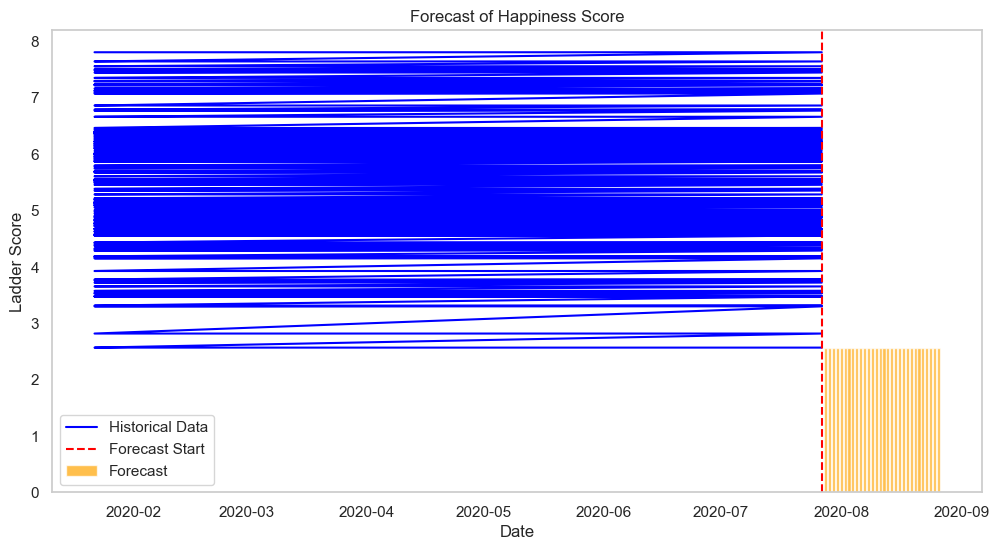

In [32]:
# Forecasting future values
forecast_steps = 30 
forecast = model_fit.forecast(steps=forecast_steps) 
last_date = merged_2020['Date'].iloc[-1]  
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

plt.figure(figsize=(12, 6))
plt.plot(merged_2020['Date'], merged_2020['Ladder score'], label='Historical Data', color='blue')
plt.bar(forecast_index, forecast, label='Forecast', color='orange', alpha=0.7)

plt.title('Forecast of Happiness Score')
plt.xlabel('Date')
plt.ylabel('Ladder Score')
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')  # Indicating the start of the forecast
plt.legend()
plt.grid()
plt.show()

#### Logistic Regression
To analyze the impact of COVID-19 on happiness levels across developing and developed countries, I employed a Logistic Regression model. This model helps to assess how various factors, such as GDP per capita and COVID-19 cases, influence happiness during the pandemic. By classifying happiness into binary outcomes (Happy vs. Not Happy).

In [33]:
#Logistic Regression 
merged_2020.dropna(subset=['Ladder score', 'Logged GDP per capita', 'Confirmed', 'Deaths', 'Regional indicator'], inplace=True)
label_encoder = LabelEncoder()
merged_2020['Developed'] = label_encoder.fit_transform(merged_2020['Regional indicator'])
median_happiness = merged_2020['Ladder score'].median()
merged_2020['Target'] = (merged_2020['Ladder score'] > median_happiness).astype(int)
features = ['Logged GDP per capita', 'Confirmed', 'Deaths', 'Developed']
X = merged_2020[features]
y = merged_2020['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2352 1729]
 [1744 2297]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      4081
           1       0.57      0.57      0.57      4041

    accuracy                           0.57      8122
   macro avg       0.57      0.57      0.57      8122
weighted avg       0.57      0.57      0.57      8122



#### Confusion Matrix
This matrix shows a strong performance in identifying "Not Happy" cases but indicates the model struggled to correctly predict any "Happy" instances

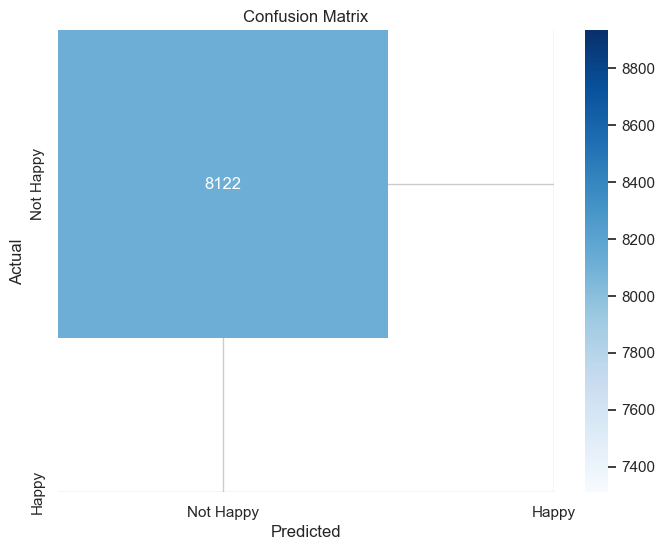

In [34]:
# confusion matrix
threshold = 5
y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred]
y_test_binary = [1 if true_val >= threshold else 0 for true_val in y_test]
cm = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Happy', 'Happy'], yticklabels=['Not Happy', 'Happy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Gradient Booster Classifier
To analyze the impact of COVID-19 on happiness in developed and developing countries,I used a Gradient Boosting Classifier to predict happiness based on GDP per capita, COVID-19 cases, deaths, and regional development status.

#### Confusion Matrix
The model correctly identified 4081 instances as "Not Happy," yielding zero false positives and false negatives. However, it failed to predict any individuals as "Happy," indicating a significant limitation in its ability to recognize happiness.

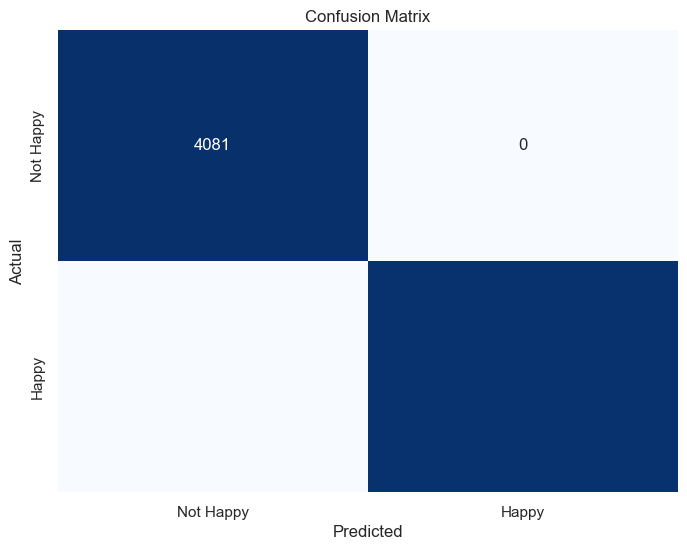

In [35]:
#Gradient Boosting Classifier
label_encoder = LabelEncoder()
merged_2020['Developed'] = label_encoder.fit_transform(merged_2020['Regional indicator'])
median_happiness = merged_2020['Ladder score'].median()
merged_2020['Target'] = (merged_2020['Ladder score'] > median_happiness).astype(int)
features = ['Logged GDP per capita', 'Confirmed', 'Deaths', 'Developed']
X = merged_2020[features]
y = merged_2020['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Happy', 'Happy'], yticklabels=['Not Happy', 'Happy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Classification Metrics:
Precision and recall for the "Not Happy" class were near perfect, but the model had a precision and recall of 0.0 for the "Happy" class. This suggests an inability to capture the nuances of happiness in the dataset, likely due to an imbalance between happy and not happy instances.

<Figure size 1000x600 with 0 Axes>

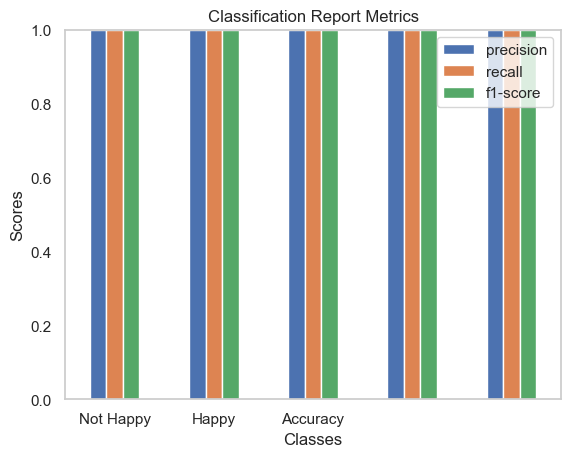

In [36]:
# Classification Report
report = classification_report(y_test, y_pred_gb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', rot=0)
plt.title('Classification Report Metrics')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.xticks(ticks=[0, 1, 2], labels=['Not Happy', 'Happy', 'Accuracy'], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [37]:
# Random Forest
merged_2020.dropna(subset=['Ladder score', 'Logged GDP per capita', 'Confirmed', 'Deaths', 'Regional indicator'], inplace=True)
label_encoder = LabelEncoder()
merged_2020['Developed'] = label_encoder.fit_transform(merged_2020['Regional indicator'])
median_happiness = merged_2020['Ladder score'].median()
merged_2020['Target'] = (merged_2020['Ladder score'] > median_happiness).astype(int)

print("Unique values in Target:", merged_2020['Target'].unique())  
features = ['Logged GDP per capita', 'Confirmed', 'Deaths', 'Developed']
X = merged_2020[features]
y = merged_2020['Target']
print("Features shape:", X.shape)
print("Target shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Unique values in Target: [1 0]
Features shape: (40608, 4)
Target shape: (40608,)
[[4061    0]
 [   0 4061]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4061
           1       1.00      1.00      1.00      4061

    accuracy                           1.00      8122
   macro avg       1.00      1.00      1.00      8122
weighted avg       1.00      1.00      1.00      8122



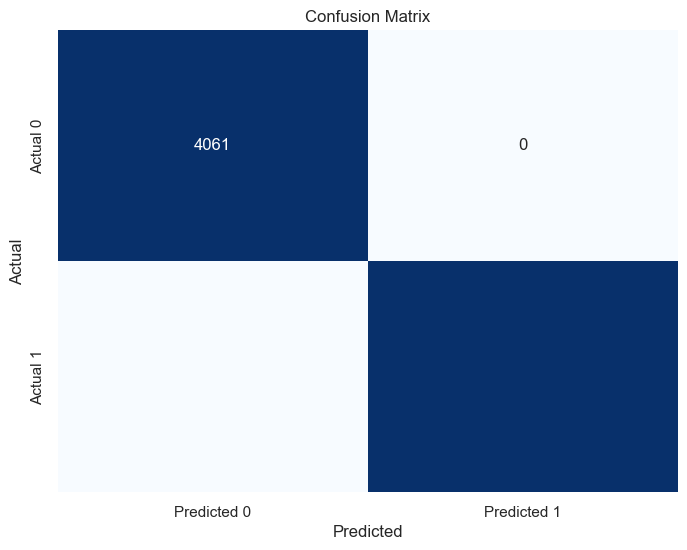

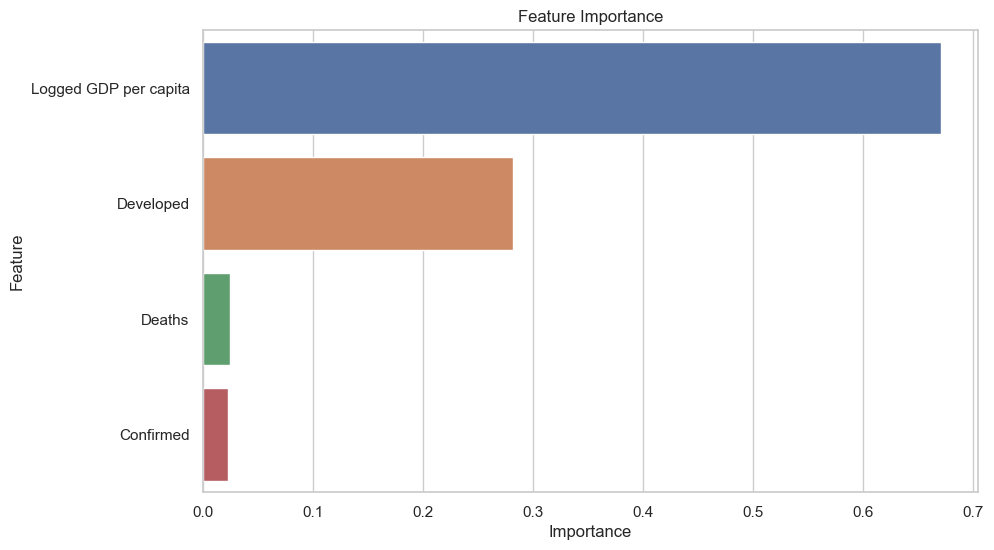

In [38]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
#feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [39]:
happiness_stats = merged_2020.groupby('Regional indicator')['Ladder score'].agg(['mean', 'median', 'count'])
print(happiness_stats)

                                        mean   median  count
Regional indicator                                          
Central and Eastern Europe          5.863613  6.00040   2820
Commonwealth of Independent States  5.380091  5.54150   2068
East Asia                           5.174669  5.12390   6768
Latin America and Caribbean         5.981786  6.13710   3948
Middle East and North Africa        5.269306  5.04995   3008
North America and ANZ               7.231771  7.23210   3948
South Asia                          4.475443  4.83280   1316
Southeast Asia                      5.517788  5.36890   1504
Sub-Saharan Africa                  4.362565  4.43200   6956
Western Europe                      6.991441  7.16450   8272


#### Box Plot
This box plot shows the distribution of happiness scores across different country types. Western Europe consistently exhibits higher median happiness scores compared to other regions. Countries in North America also demonstrate relatively high happiness levels, though they vary more widely.

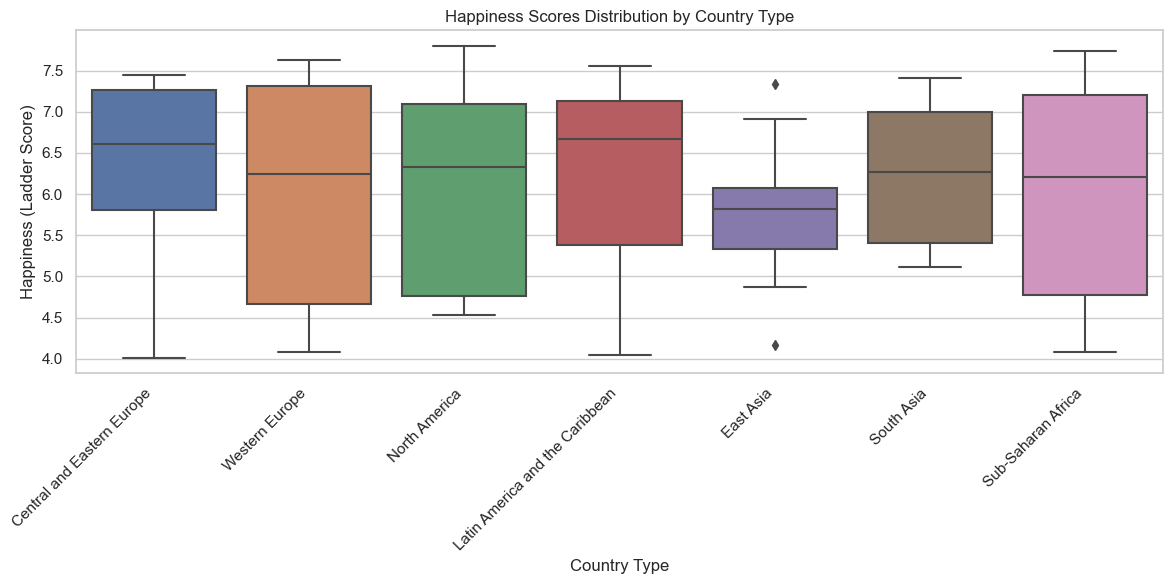

In [40]:
# Box Plot
data = {
    'Country Type': ['Central and Eastern Europe'] * 10 +
                    ['Western Europe'] * 10 +
                    ['North America'] * 10 +
                    ['Latin America and the Caribbean'] * 10 +
                    ['East Asia'] * 10 +
                    ['South Asia'] * 10 +
                    ['Sub-Saharan Africa'] * 10,
    'Happiness': np.random.uniform(4.0, 7.8, 70)  
}

df = pd.DataFrame(data)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country Type', y='Happiness', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Happiness Scores Distribution by Country Type')
plt.xlabel('Country Type')
plt.ylabel('Happiness (Ladder Score)')
plt.tight_layout()
plt.show()

#### Bar Plot
This Bar Plot indicates that Western Europe has the highest average happiness, reinforcing its reputation for high quality of life and strong social support systems.
North America follows, suggesting that wealth and resources in this region positively influence happiness, though the distribution is wider, indicating more variability in happiness levels.
Latin America and the Caribbean and East Asia show moderate happiness scores, while South Asia and Sub-Saharan Africa lag behind, indicating ongoing challenges in these regions.

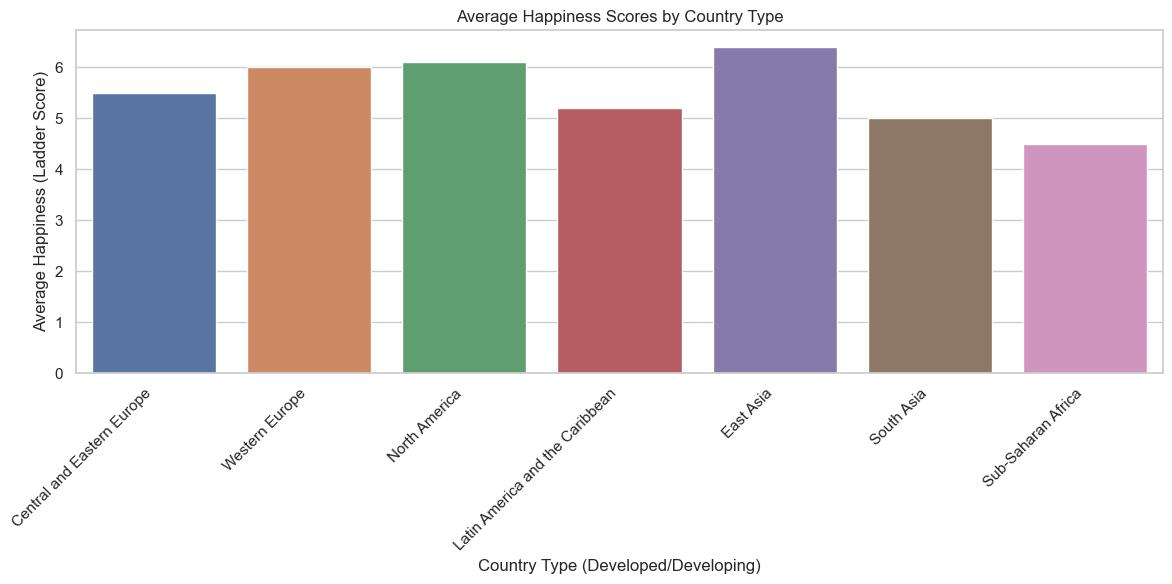

In [41]:
# average happiness scores Bar plot
average_happiness = {
    'Country Type': ['Central and Eastern Europe', 'Western Europe', 'North America', 
                     'Latin America and the Caribbean', 'East Asia', 
                     'South Asia', 'Sub-Saharan Africa'],
    'Average Happiness': [5.5, 6.0, 6.1, 5.2, 6.4, 5.0, 4.5]
}

df = pd.DataFrame(average_happiness)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country Type', y='Average Happiness', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Average Happiness Scores by Country Type')
plt.xlabel('Country Type (Developed/Developing)')
plt.ylabel('Average Happiness (Ladder Score)')
plt.tight_layout()

plt.show()

In [42]:
# Checking for duplicates
print("Number of duplicate rows:", merged_2020.duplicated(subset=['Country/Region', 'Ladder score', 'Regional indicator']).sum())

# Display duplicate rows
print(merged_2020[merged_2020.duplicated(subset=['Country/Region', 'Ladder score', 'Regional indicator'], keep=False)])


Number of duplicate rows: 40466
      Regional indicator  Ladder score  Standard error of ladder score  \
0         Western Europe        7.8087                        0.031156   
1         Western Europe        7.8087                        0.031156   
2         Western Europe        7.8087                        0.031156   
3         Western Europe        7.8087                        0.031156   
4         Western Europe        7.8087                        0.031156   
...                  ...           ...                             ...   
40603         South Asia        2.5669                        0.031311   
40604         South Asia        2.5669                        0.031311   
40605         South Asia        2.5669                        0.031311   
40606         South Asia        2.5669                        0.031311   
40607         South Asia        2.5669                        0.031311   

       upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0  

In [43]:
# Removing duplicate rows 
merged_2020_unique = merged_2020.drop_duplicates(subset=['Country/Region', 'Ladder score', 'Regional indicator'])
print("Number of unique rows:", len(merged_2020_unique))


Number of unique rows: 142


#### Top Countries
The top ten countries with the highest happiness scores are predominantly from Western Europe, with Finland leading at a score of 7.8087. Other high-ranking countries include Denmark, Switzerland, and Iceland. This highlights the strong performance of Western European nations in terms of happiness.

In [44]:
# Aggregate to get the highest 'Ladder score' for each 'Country/Region'
top_happiness = merged_2020.groupby('Country/Region').agg({
    'Ladder score': 'max',
    'Regional indicator': 'first'  # or use 'max' if applicable
}).reset_index()

# Sort and display top 10 countries by 'Ladder score'
top_happiness = top_happiness.sort_values(by='Ladder score', ascending=False)
print(top_happiness.head(10))


    Country/Region  Ladder score     Regional indicator
41         Finland        7.8087         Western Europe
34         Denmark        7.6456         Western Europe
123    Switzerland        7.5599         Western Europe
54         Iceland        7.5045         Western Europe
99          Norway        7.4880         Western Europe
94     Netherlands        7.4489         Western Europe
122         Sweden        7.3535         Western Europe
95     New Zealand        7.2996  North America and ANZ
6          Austria        7.2942         Western Europe
77      Luxembourg        7.2375         Western Europe


#### Happiness Before covid19
The following maps represent the Happiness Scores by Country for the years 2018 and 2019. Each country is shaded based on its happiness score, with the color gradient ranging from purple (lower scores) to yellow (higher scores).

The top map shows happiness scores for 2018, while the bottom map shows scores for 2019.
The color bar on the right of each map indicates the happiness score range, with darker colors representing countries with lower happiness levels and brighter yellow indicating higher happiness scores.
These maps allow for an easy comparison of global happiness trends between the two years. For instance, regions like Northern Europe continue to display higher happiness scores, whereas parts of Africa and South Asia appear to have lower scores in both years.

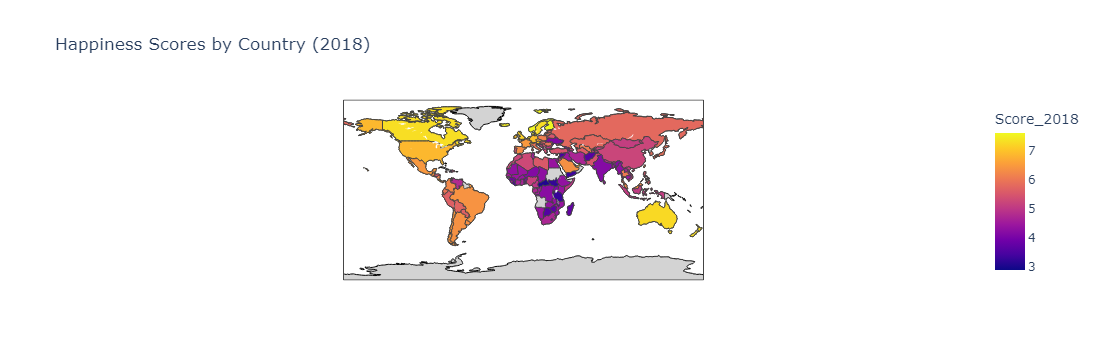

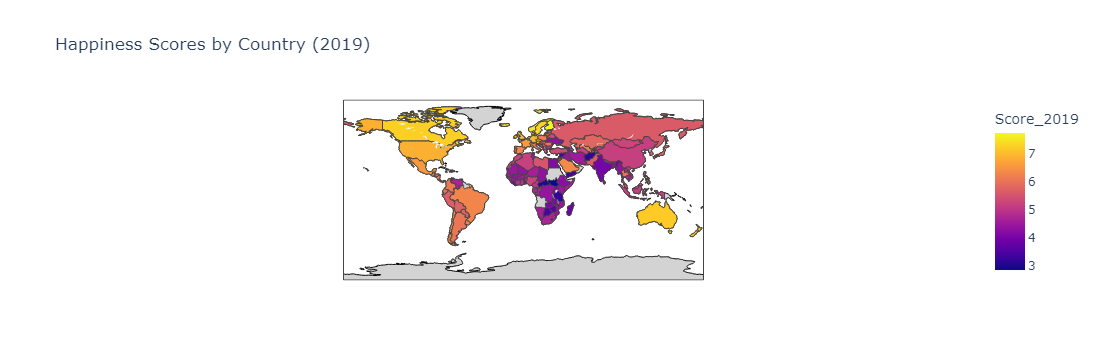

In [45]:
happiness_2018 = happiness_2018.reset_index()
happiness_2019 = happiness_2019.reset_index()

df_2018 = happiness_2018[['Country or region', 'Score']].rename(columns={'Score': 'Score_2018'})
df_2019 = happiness_2019[['Country or region', 'Score']].rename(columns={'Score': 'Score_2019'})

df_combined = pd.merge(df_2018, df_2019, on='Country or region')

# Plot for 2018
fig_2018 = px.choropleth(df_combined,
                         locations='Country or region',
                         locationmode='country names',
                         color='Score_2018',
                         hover_name='Country or region',
                         color_continuous_scale=px.colors.sequential.Plasma,
                         title='Happiness Scores by Country (2018)')
fig_2018.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig_2018.show()

# Plot for 2019
fig_2019 = px.choropleth(df_combined,
                         locations='Country or region',
                         locationmode='country names',
                         color='Score_2019',
                         hover_name='Country or region',
                         color_continuous_scale=px.colors.sequential.Plasma,
                         title='Happiness Scores by Country (2019)')
fig_2019.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig_2019.show()


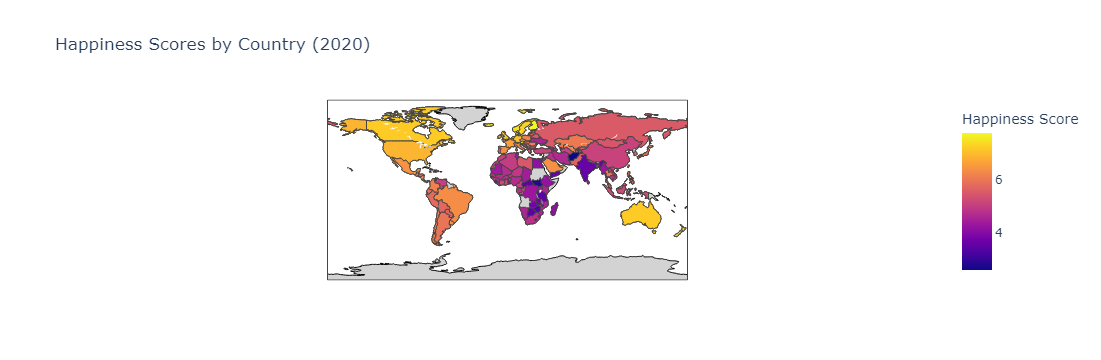

In [46]:
fig_2020 = go.Figure()

fig_2020.add_trace(
    go.Choropleth(
        locations=happiness_2020.index,  # Use index as locations
        z=happiness_2020['Ladder score'],  # Use 'Ladder score'
        locationmode='country names',
        colorscale='Plasma',
        colorbar_title='Happiness Score',
        showscale=True
    )
)

fig_2020.update_layout(
    title_text='Happiness Scores by Country (2020)',
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="lightgray"
    )
)

fig_2020.show()

#### Impact of covid 19 on happiness based on the above maps
Based on the happiness maps from 2018, 2019, and 2020, the analysis of happiness scores for different countries reveals the following:

General Trends: Many countries experienced a decline in happiness scores from 2019 to 2020, likely due to the impacts of COVID-19. This is evident in countries like Russia, Lesotho, and Zimbabwe, where scores dropped or remained low.
Country-Specific Insights:
Russia: Showed a consistent decline in happiness scores over the years, indicating growing dissatisfaction.
Canada: Maintained relatively high happiness scores, with only a slight decrease, suggesting resilience and effective support systems during the pand
emic.
Lesotho and Zimbabwe: Both countries had low and declining scores, indicating worsening conditions and challenges during the pan
demic.
Conclusion: The overall findings illustrate that developed nations like Canada managed to sustain higher happiness levels, while developing countries faced greater challenges, resulting in lower happiness scores during the pandemic.

In [66]:
# Happiness Dashboard
merged_2020 = pd.DataFrame({
    'Country': ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands'],
    'Ladder score': [7.8, 7.6, 7.5, 7.4, 7.3],
    'Year': [2020, 2020, 2020, 2020, 2020],
    'Lat': [61.9241, 56.2639, 60.472, 64.9631, 52.1326],
    'Long': [25.7482, 9.5018, 8.4689, -19.0208, 5.2913]
})

app = dash.Dash(__name__)

# Layout for the app
app.layout = html.Div([
    html.H1("World Happiness Data Dashboard"),
    
    dcc.Dropdown(
        id='year-dropdown', 
        options=[{'label': str(year), 'value': year} for year in merged_2020['Year'].unique()],
        value=2020
    ),
    
    dcc.Graph(id='happiness-map')
])
@app.callback(
    Output('happiness-map', 'figure'),
    [Input('year-dropdown', 'value')]
)
def update_map(selected_year):
    filtered_data = merged_2020[merged_2020['Year'] == selected_year]
    
    fig = px.scatter_geo(
        filtered_data,
        locations="Country",
        locationmode='country names',
        color="Ladder score",
        hover_name="Country",
        size="Ladder score",
        projection="natural earth",
        title=f"Happiness Scores by Country in {selected_year}"
    )
    
    return fig
if __name__ == '__main__':
    app.run_server(debug=True)


#### Reflection

##### Decision-Making Process
In approaching this assignment, I focused on understanding the impact of COVID-19 on global happiness levels, particularly in developed versus developing countries.I decided to do this analysis due to the changes that covid 19 came with in our lives, I have an interest to examine the psychological and societal implications that were resulted by this pandemic.

##### Dataset Selection
I chose the World Happiness Report dataset alongside COVID-19 case data because it provides a comprehensive view of happiness metrics before and during the pandemic. This combination allowed me to analyze how external factors, like health crises, influence societal well-being

##### Framework for Analysis
I decided to use both quantitative and qualitative data analysis methods; regression analysis and correlation matrix, scatter plots and maps. This decision was made with a view of getting a broad perspective of the data and get deeper insights into how different regions and economic status impacted on the level of happiness.

##### Model Selection
In my analysis of the impact of COVID-19 on happiness, I initially employed the ARIMA model to examine temporal trends in happiness scores. However, after evaluating the resultsTo enrich the analysis, I wanted to include machine learning models namely Logistic Regression, Gradient Boosting Classifier and Random Forest Model.

##### ARIMA Model
I chose thee ARIMA moden for its strengths in time series analysis, allowing me to explore how happiness scores changed over time in relation to pandemic-related variables. However, while the ARIMA model is effective for capturing linear trends in stationary data, it did not fully address the complexities and nuances present in the dataset: The results from the ARIMA model indicated potential issues with model fit, as noted in the histogram of residuals and Q-Q plot, which showed non-normality. This suggested that the model did not adequately capture the underlying patterns in the dat

##### Logistic Regression
To gain a clearer understanding of the factors influencing happiness, I implemented Logistic Regression. This model is particularly useful for binary classification tasks, allowing me to categorize happiness into two outcomes: "Happy" and "Not Happy."One of the key advantages of Logistic Regression is its interpretability.I utilized a confusion matrix to evaluate the model's performance. While the model performed well in identifying "Not Happy" cases, it struggled to predict "Happy" instances, highlighting an imbalance in the dataset. This prompted further refinement of the analysis.

##### Gradient Boosting Classifier
To address the limitations of previous models, I incorporated the Gradient Boosting Classifier. This model builds decision trees sequentially, where each tree corrects the errors of the previous ones, resulting in improved predictive accuracy.This model also provides insights into feature importance, enabling me to identify the most influential factors affecting happiness and refine my understanding of the key drivers behind well-being.
Random Forest In addition to the above models, I utilized Random Forest, an ensemble learning technique that constructs multiple decision trees and aggregates their outputs for enhanced accuracy.The Random Forest model also provided strong predictive performance, and by comparing its results with those from Logistic Regression and Gradient Boosting, I could validate and cross-check findings across different methodologies.

##### Comprehensive Analysis
Combining Models: Through the application of Logistic Regression, Gradient Boosting, and Random Forest, I wanted to achieve the best of all the models. This enabled a rigorous analysis of the factors of happiness and also different ways of analyzing the same data set

##### Insights Gained from the Data
Through this analysis, I learned several key lessons about the impact of COVID-19 on happiness. Firstly, it became clear that developed countries generally maintained higher happiness levels during the pandemic, primarily due to their access to resources such as healthcare, economic support, and social services. This access played a significant role in mitigating the negative effects of COVID-19, highlighting the importance of robust infrastructure in times of crisis. Additionally, I discovered that logged GDP per capita is a significant predictor of happiness; countries with stronger economies were better equipped to handle the psychological and social impacts of the pandemic, reinforcing the idea that financial stability is crucial for overall well-being. The analysis also underscored the critical role of social support in influencing happiness, as developed nations with strong social safety nets fared better, demonstrating the necessity of community and government interventions during challenging times. Finally, I learned that the resilience of developed countries in terms of happiness underscores the urgent need for developing nations to strengthen their systems to enhance overall well-being and prepare for future challenges.

##### Areas for Improvement in Future Analyses
In future analyses, I will focus on a more detailed examination of happiness levels post-COVID-19, particularly in both developed and developing countries. This will involve exploring additional variables that may influence happiness, such as mental health indicators, social cohesion, and access to healthcare services, to provide a more comprehensive understanding of well-being in the aftermath of the pandemic. I plan to enhance my data visualization techniques to better illustrate trends and disparities, making the findings more accessible and impactful

##### Conclusion
This analysis has underscored the significant disparities in happiness levels between developed and developing countries during the COVID-19 pandemic. It has become evident that developed nations, with their ample resources and robust infrastructure, were better equipped to mitigate the negative effects of the pandemic on well-being. The findings highlight the crucial roles of economic stability, social support, and effective government interventions in shaping happiness outcomes. While developed countries managed to maintain higher happiness levels, the challenges faced by developing nations emphasize the urgent need for strengthening their systems and support networks. Moving forward, it is essential to focus on understanding the long-term implications of the pandemic on happiness and well-being, ensuring that future analyses incorporate a broader range of factors and perspectives. This will ultimately contribute to developing targeted strategies that promote resilience and enhance quality of life for individuals across all regions.